### AdvancedRegression-SurpriseHousing
Surprise housing dataset using lasso and ridge regression

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house How well those variables describe the price of a house. Also, determine the optimal value of lambda for ridge and lasso regression.

Business Goal You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

DATA DESCRIPTION AT END OF FILE.


In [ ]:
Source Code : https://www.kaggle.com/snehac47/house-price-prediction-ridge-lasso-regression/notebook

## 1. IMPORTING DATASET AND LIBRARIES

In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [382]:
hs=pd.read_csv("Housing.csv")

In [383]:
hs.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [384]:
hs.shape

(1460, 81)

In [385]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### The pandas_profiling library in Python include a method named as ProfileReport() which generate a basic report on the input DataFrame. 

The report consist of the following:

DataFrame overview,
Each attribute on which DataFrame is defined,
Correlations between attributes (Pearson Correlation and Spearman Correlation), and
A sample of DataFrame.

In [386]:
numeric_data = hs.select_dtypes(include = ['float64','int64'])
numeric_data.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [387]:
hs_missing=pd.DataFrame((round(100*(hs.isnull().sum()/hs.shape[0]), 2)), columns=['missing'])
hs_missing.sort_values(by=['missing'], ascending=False).head(20)

missing
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00

### To understand field description please refer to document file

### Treating null values upon perusing field description

In [388]:
#addressing NaN values based on data description

# In column 'PoolQC' (Pool quality), NaN stands for No Pool
hs['PoolQC'] = hs['PoolQC'].fillna('No_Pool')

# In column 'MiscFeature' (Miscellaneous Features), NaN stands for None, meaning the house has no miscellaneous features.
hs['MiscFeature'] = hs['MiscFeature'].fillna('None')

# In column 'Alley', NaN stands for No Alley Access as per the data description
hs['Alley'] = hs['Alley'].fillna('No_Alley_Access')

# In column 'Fence' (Fence Quality), NaN stands for No Fence as per the data description
hs['Fence'] = hs['Fence'].fillna('No_Fence')

# In column 'FireplaceQu' (FireplaceQu Quality), NaN stands for No Fireplace as per the data description
hs['FireplaceQu'] = hs['FireplaceQu'].fillna('No_Fireplace')

# LotFrontage stands for Linear feet of street connected to property, there is no explanation to impute this in data description
# Let's consider imputing it with median of the lotFrontage of houses in the same neighbourhood

# Group data by neighborhood and impute missing value with median LotFrontage of all the neighborhood
hs["LotFrontage"] = hs.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# In column 'GarageYrBlt' (Gargae Year Built), NaN stands for houses with no garage, let's impute with 0
hs['GarageYrBlt'] = hs['GarageYrBlt'].fillna(0)

# 'GarageType', 'GarageFinish', 'GarageQual' (Garage Quality) and 'GarageCond'(Garage Condition)
# Missing values signify no garage as per data description.let's impute NaN values here with No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    hs[col] = hs[col].fillna('No_Garage')

#BsmtFinType1, BsmtFinType2 (Rating of basement finished area),
#BsmtExposure (Basement Exposure), BsmtQual(Basement Quality), BsmtCond (Basement Conidtion)
#These are all parameter related to basement. A NaN value probably signifies that the house does not have a basement.
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    hs[col] = hs[col].fillna('No_Basement')
    
# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode "None"
hs['MasVnrType'] = hs['MasVnrType'].fillna('None')

# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode 0 corresponding to None
hs['MasVnrArea'] = hs['MasVnrArea'].fillna(0)

# In column 'Electrical' (Electrical system), let's impute NaN with "Other"
hs['Electrical'] = hs['Electrical'].fillna("Other")
#checking percentage of null values in each column

hs_missing=pd.DataFrame((round(100*(hs.isnull().sum()/len(hs.index)), 2)), columns=['missing'])
hs_missing.sort_values(by=['missing'], ascending=False).head(20)

missing
Id                0.0
CentralAir        0.0
GarageYrBlt       0.0
GarageType        0.0
FireplaceQu       0.0
Fireplaces        0.0
Functional        0.0
TotRmsAbvGrd      0.0
KitchenQual       0.0
KitchenAbvGr      0.0
BedroomAbvGr      0.0
HalfBath          0.0
FullBath          0.0
BsmtHalfBath      0.0
BsmtFullBath      0.0
GrLivArea         0.0
LowQualFinSF      0.0
2ndFlrSF          0.0
1stFlrSF          0.0
GarageFinish      0.0

## 2. EDA and Data Preparation

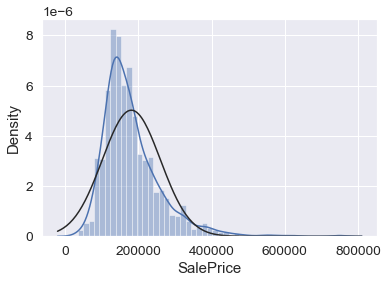

In [389]:
#Let us first visualize the spread of Target Variable 'Sale Price'
from scipy.stats import norm
sns.distplot(hs['SalePrice'], fit=norm)
plt.show()

### The Sale Price distribution is not normally distributed, it is a little positively skewed with some houses having really high Sale Price

In [390]:
## "MSSubClass" is a numeric column but it should actually be categorical as per the data dictionary, so let's convert that.

hs=hs.replace({'MSSubClass' : { 20 : '1-STORY 1946 & NEWER ALL STYLES', 
                                          30:'1-STORY 1945 & OLDER',
                                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                          50:'1-1/2 STORY FINISHED ALL AGES',
                                          60:'2-STORY 1946 & NEWER',
                                          70:'2-STORY 1945 & OLDER',
                                          75:'2-1/2 STORY ALL AGES',
                                          80:'SPLIT OR MULTI-LEVEL',
                                          85:'SPLIT FOYER',
                                          90:'DUPLEX - ALL STYLES AND AGES',
                                         120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                         150:'1-1/2 STORY PUD - ALL AGES',
                                         160:'2-STORY PUD - 1946 & NEWER',
                                         180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                         190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}})

In [391]:
numeric_data = hs.select_dtypes(include = ['float64','int64','int32'])
numeric_data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### "ID" column is like row number, it has all unique values and can be ignored for analysis.

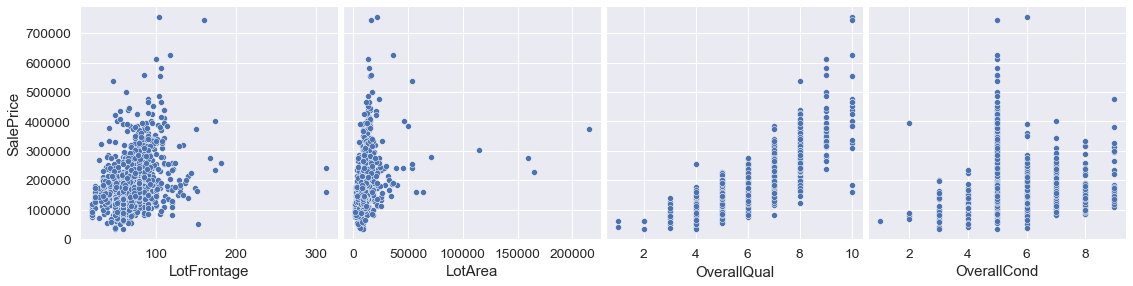

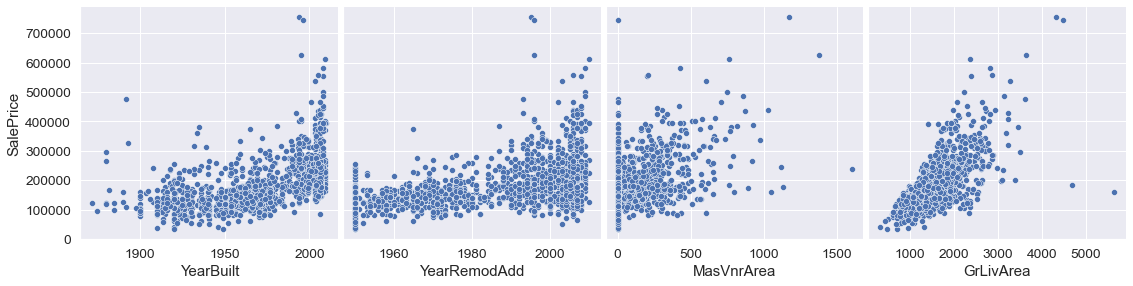

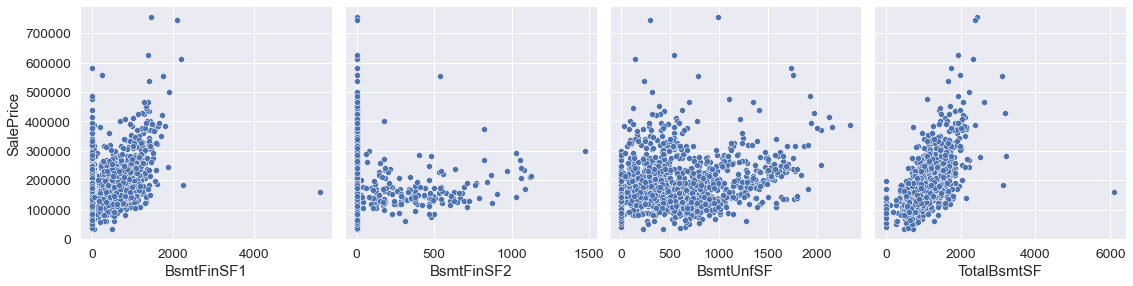

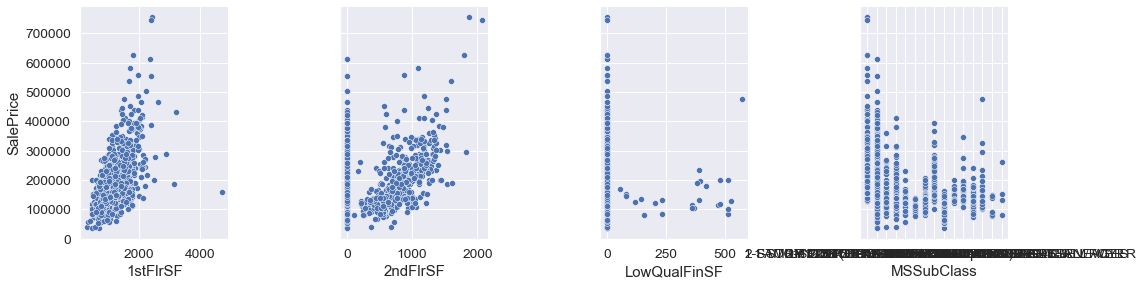

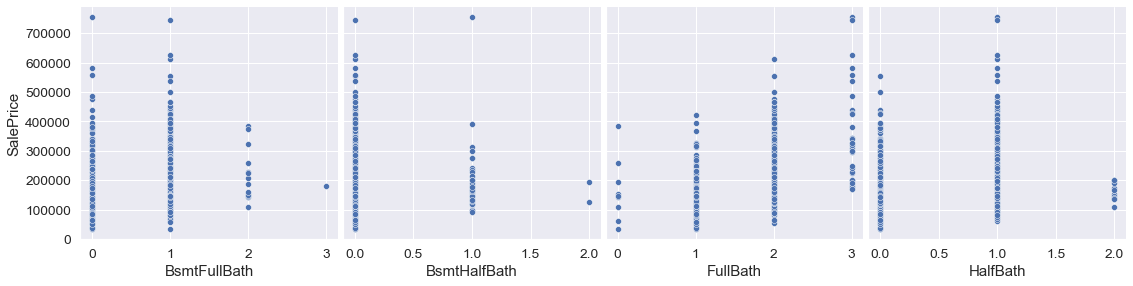

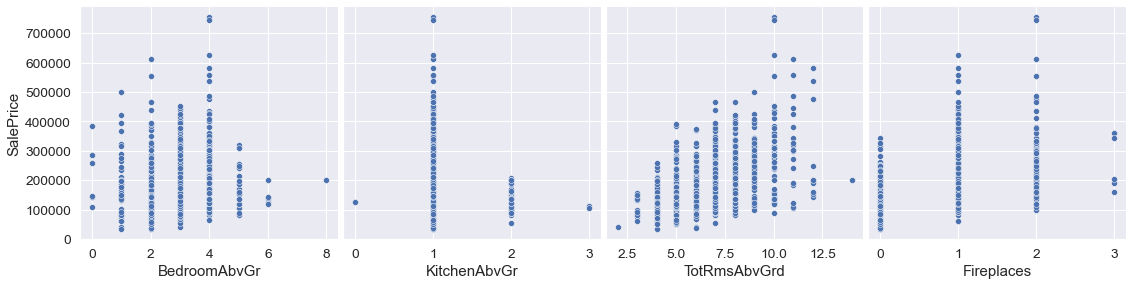

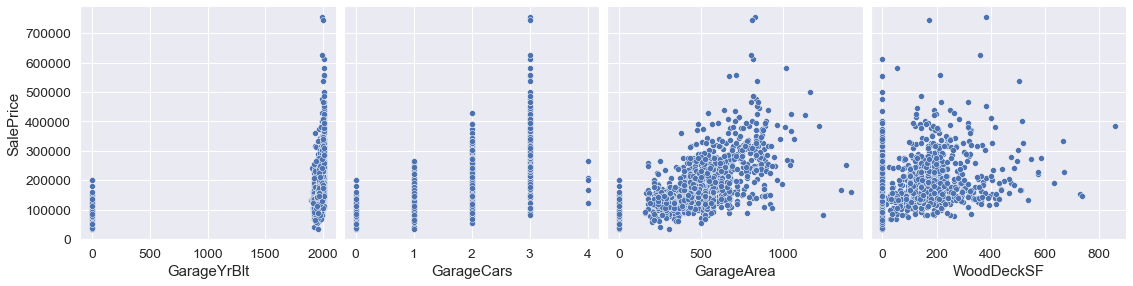

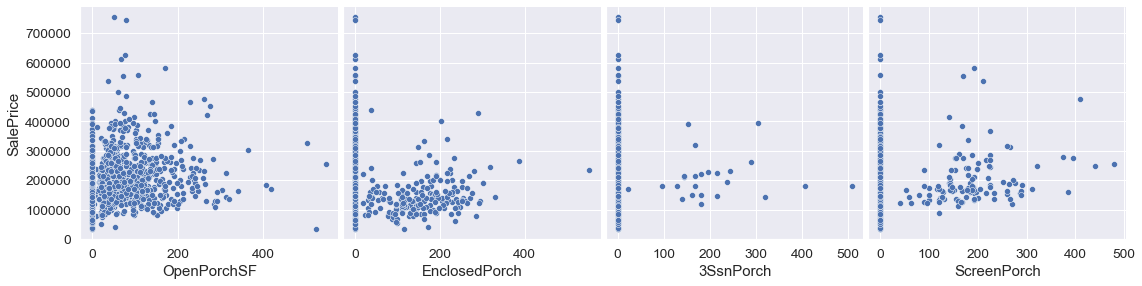

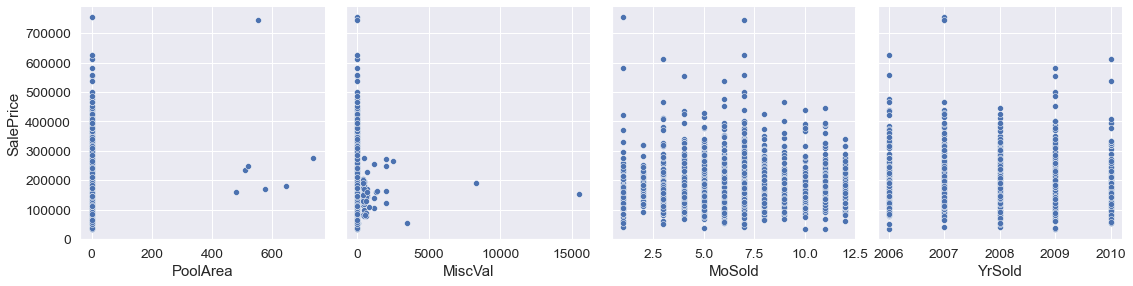

In [392]:
#function to plot scatter plot numeric variables with price

def pp(w,x,y,z):
    sns.pairplot(hs, x_vars=[w,x,y,z], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

pp('LotFrontage', 'LotArea', 'OverallQual','OverallCond')
pp('YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea')
pp('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF')
pp('1stFlrSF', '2ndFlrSF','LowQualFinSF','MSSubClass')
pp('BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath')
pp('BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces')
pp('GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF')
pp('OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch')
pp('PoolArea','MiscVal', 'MoSold', 'YrSold')

In [393]:
# label encode ordinal features where there is order in categories

hs = hs.replace({  "Alley":        {"No_Alley_Access" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "BsmtExposure": {"No_Basement" : 0, "No" : 2, "Mn" : 2, "Av": 3, 
                                        "Gd" : 4},
                       "BsmtFinType1": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                       "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "Fence":        {"No_Fence" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, 
                                        "GdPrv" : 4},
                       "FireplaceQu":  {"No_Fireplace" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, 
                                        "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, 
                                        "Typ" : 8},
                       "GarageCond":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageQual":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"No_Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, 
                                        "Lvl" : 4},
                       "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, 
                                        "Reg" : 4},
                       "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC":       {"No_Pool" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, 
                                        "Ex" : 4},
                       "Street":       {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, 
                                        "AllPub" : 4}})
hs.BsmtCond = hs.BsmtCond.astype(int)

In [394]:
def plot_charts(var1,var2,label_rotation):
    plt.figure(figsize=(12, 10))   
    plt.subplot(2,2,1)
    plt.title('Count Plot of '+ var1)
    plt1=sns.countplot(hs[var1], palette=("husl"))
    plt1.set(xlabel = '%s'%var1, ylabel='Count of'+ '%s'%var1)
    if(label_rotation):
        plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
        
    plt.subplot(2,2,2)
    plt.title(var1+' vs Price')
    plt2=sns.boxplot(x=hs[var1], y=hs.SalePrice, palette=("husl"))
    if(label_rotation):
        plt2.set_xticklabels(plt2.get_xticklabels(),rotation=90)
    
    plt.subplot(2,2,3)
    plt.title('Count Plot of '+ var2)
    plt3=sns.countplot(hs[var2], palette=("husl"))
    plt3.set(xlabel = '%s'%var2, ylabel='Count of'+ '%s'%var2)
    if(label_rotation):
        plt3.set_xticklabels(plt3.get_xticklabels(),rotation=90)
    
    plt.subplot(2,2,4)
    plt.title(var2+' vs Price')
    plt4=sns.boxplot(x=hs[var2], y=hs.SalePrice, palette=("husl"))
    if(label_rotation):
        plt4.set_xticklabels(plt4.get_xticklabels(),rotation=90)
    plt.show()

In [395]:
categorical_features=hs.select_dtypes(include='object')
categorical_features.columns

Index(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

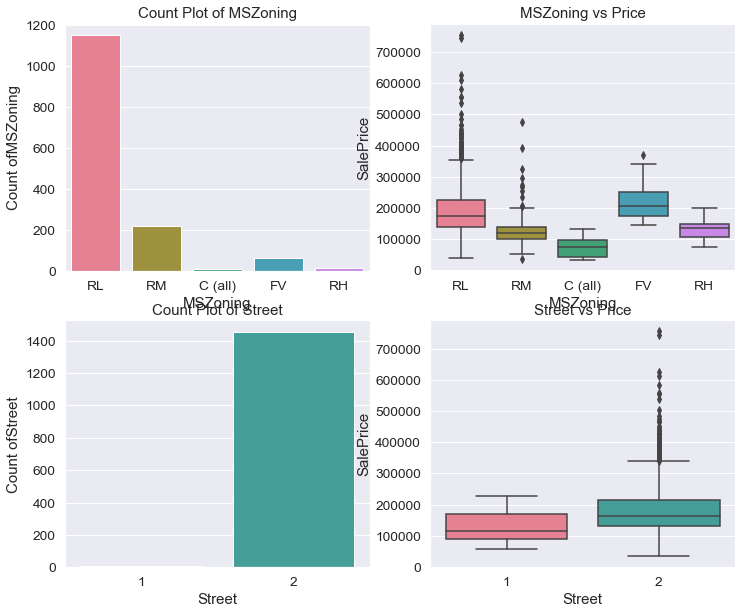

In [396]:
plot_charts('MSZoning', 'Street', label_rotation=False)

In [397]:
print('Street:\n',hs['Street'].value_counts(dropna=False))
print('MSZoning:\n',hs['MSZoning'].value_counts(dropna=False))

Street:
 2    1454
1       6
Name: Street, dtype: int64
MSZoning:
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


### Observation:

MsZoning identifies the general zoning classification of the sale.
We see that the prices vary a lot for different values and most of the records are for "RL" Residential Low Density properties.
Street identifies the Type of road access to property
While we see that houses with Paved roads have higher Sale Price compared to Gravel, we must also note that this is a highly imbalanced variable with most records as "Pave"

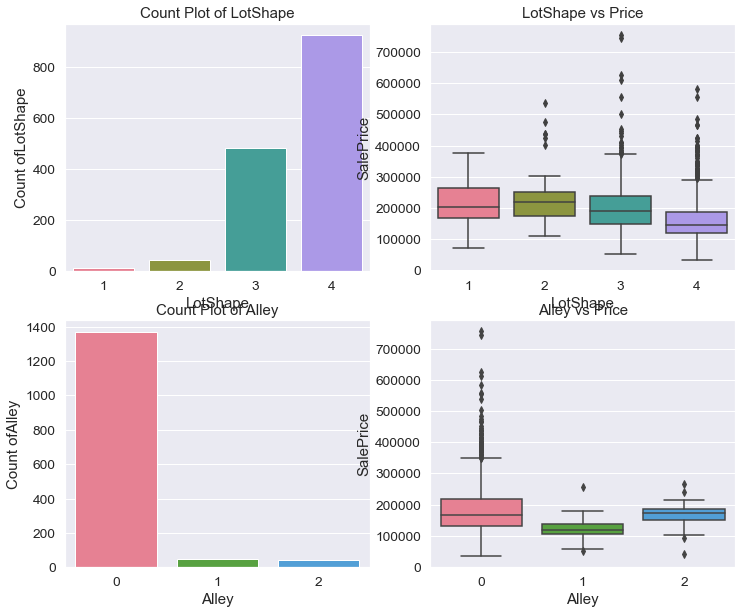

In [398]:
plot_charts('LotShape','Alley',label_rotation=False)

In [399]:
print('LotShape:\n',hs['LotShape'].value_counts(dropna=False))
print('Alley:\n',hs['Alley'].value_counts(dropna=False))

LotShape:
 4    925
3    484
2     41
1     10
Name: LotShape, dtype: int64
Alley:
 0    1369
1      50
2      41
Name: Alley, dtype: int64


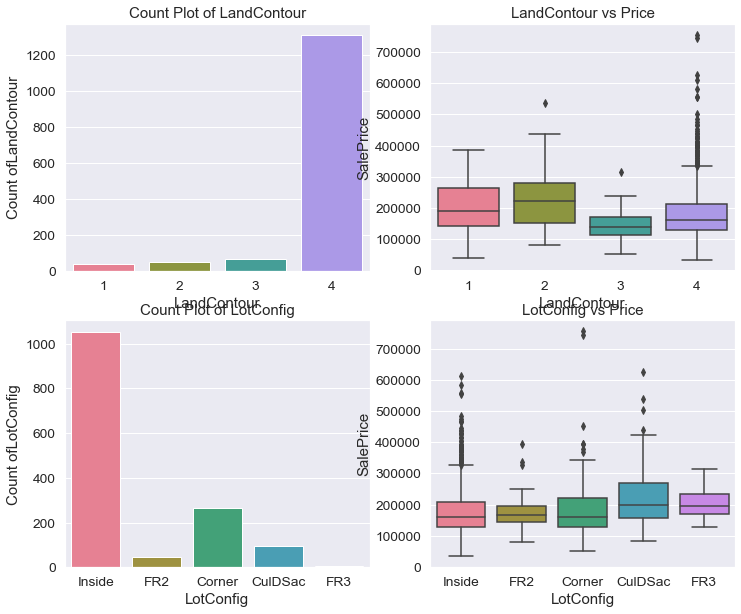

In [400]:
plot_charts('LandContour','LotConfig',label_rotation=False)

In [401]:
print('LandContour:\n',hs['LandContour'].value_counts(dropna=False))
print('LotConfig:\n',hs['LotConfig'].value_counts(dropna=False))

LandContour:
 4    1311
3      63
2      50
1      36
Name: LandContour, dtype: int64
LotConfig:
 Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


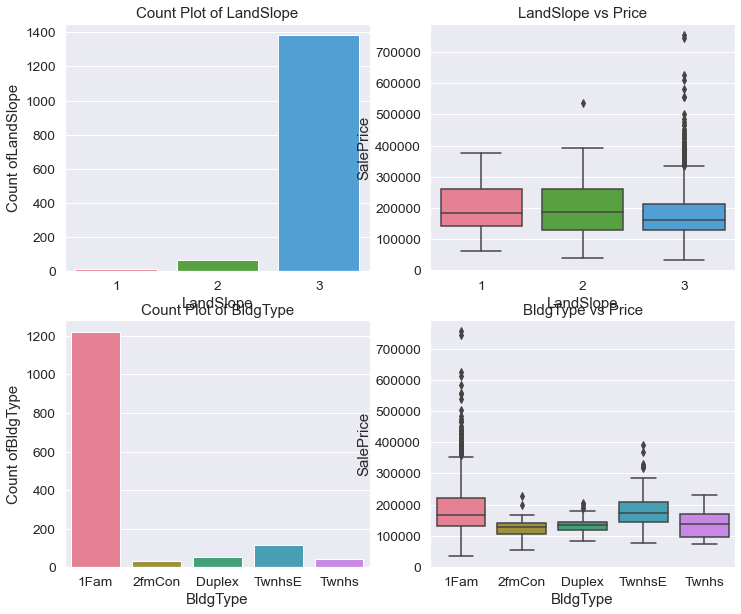

In [402]:
plot_charts('LandSlope','BldgType',label_rotation=False)

In [403]:
print('LandSlope:\n',hs['LandSlope'].value_counts(dropna=False))
print('BldgType:\n',hs['BldgType'].value_counts(dropna=False))

LandSlope:
 3    1382
2      65
1      13
Name: LandSlope, dtype: int64
BldgType:
 1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


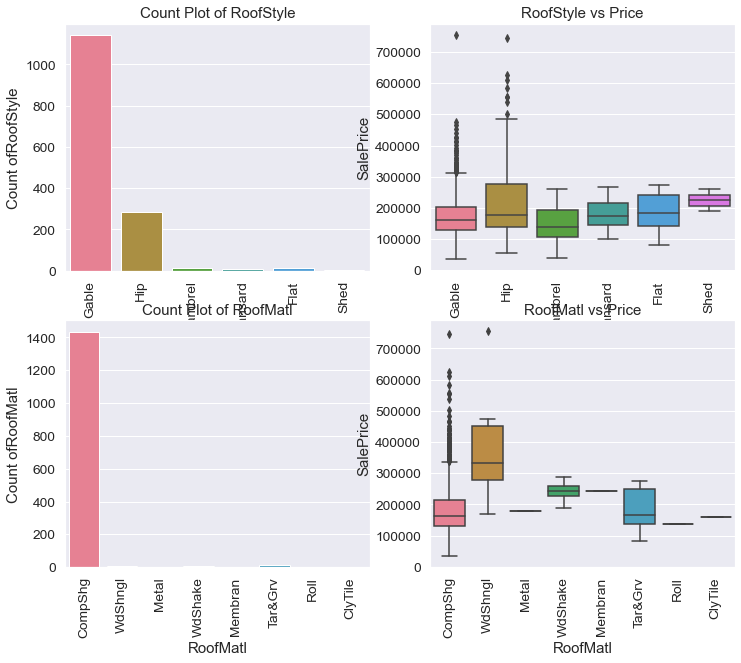

In [404]:
plot_charts('RoofStyle', 'RoofMatl',label_rotation=True)

In [405]:
print('RoofStyle:\n',hs['RoofStyle'].value_counts(dropna=False))
print('RoofMatl:\n',hs['RoofMatl'].value_counts(dropna=False))

RoofStyle:
 Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
RoofMatl:
 CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64


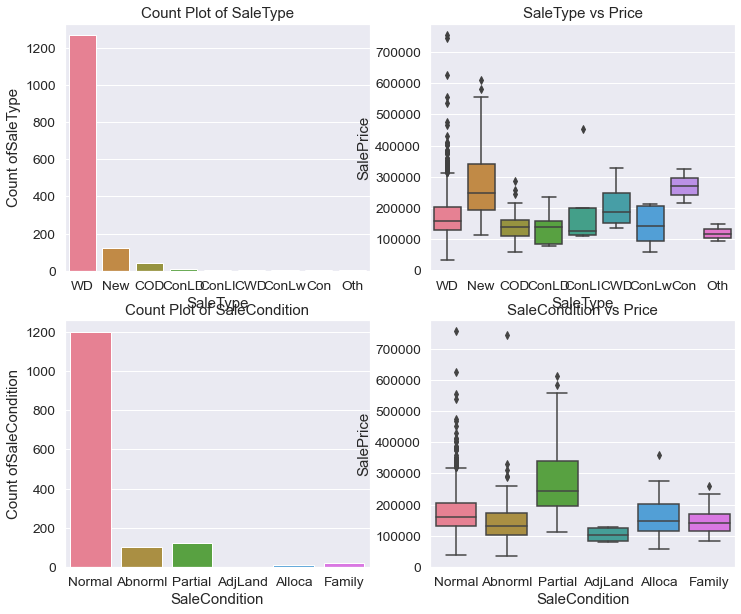

In [406]:
plot_charts('SaleType', 'SaleCondition',label_rotation=False)

In [407]:
print('SaleType:\n',hs['SaleType'].value_counts(dropna=False))
print('SaleCondition:\n',hs['SaleCondition'].value_counts(dropna=False))

SaleType:
 WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
SaleCondition:
 Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


# DATA PREPARATION

In [408]:
#changing months to categorical
import calendar

hs['MonthSold'] = hs['MoSold'].apply(lambda x: calendar.month_name[x])
hs=hs.drop(['MoSold'], axis=1)

In [409]:
#changing data type of Gararge yr built to int from float
hs['GarageYrBlt'] = hs['GarageYrBlt'].astype(int)

In [410]:
#DERIVED VARIABLES which might make more sense than year

hs['Age'] = hs['YrSold'] - hs['YearBuilt']
hs['Remod_Age'] = hs['YrSold'] - hs['YearRemodAdd']
hs['Garage_Age'] = hs['YrSold'] - hs['GarageYrBlt']
hs.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],1, inplace = True)

In [411]:
numeric_data = hs.select_dtypes(include = ['float64','int64','int32'])
numeric_data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscVal', 'SalePrice', 'Age', 'Remod_Age', 'Garage_Age'],
      dtype='object')

In [412]:
#OUTLIER TREATMENT

def remove_outliers(dtf, numl_list):
    for j in numl_list:
        Q1 = dtf[j].quantile(0.05)
        Q3 = dtf[j].quantile(0.95)
        IQR = Q3 - Q1       
        dtf = dtf[(dtf[j] >= Q1-2.5*IQR) & (dtf[j] <= Q3+2.5*IQR)]
    return dtf

In [413]:
numeric_data_list=list(numeric_data.columns)

In [414]:
hs=remove_outliers(hs,numeric_data_list)

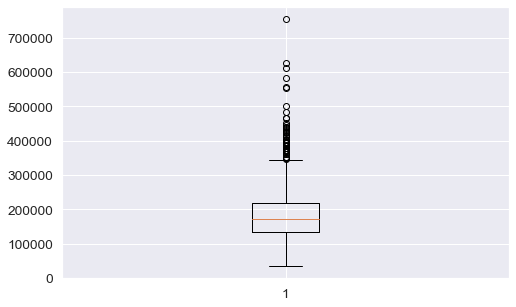

In [415]:
# Outlier treatment on the variable Sale Price
plt.figure(figsize=(8,5))
plt.boxplot(hs['SalePrice'])
plt.show()

In [416]:
hs.shape

(1158, 80)

## Auto correlation heatmap plot

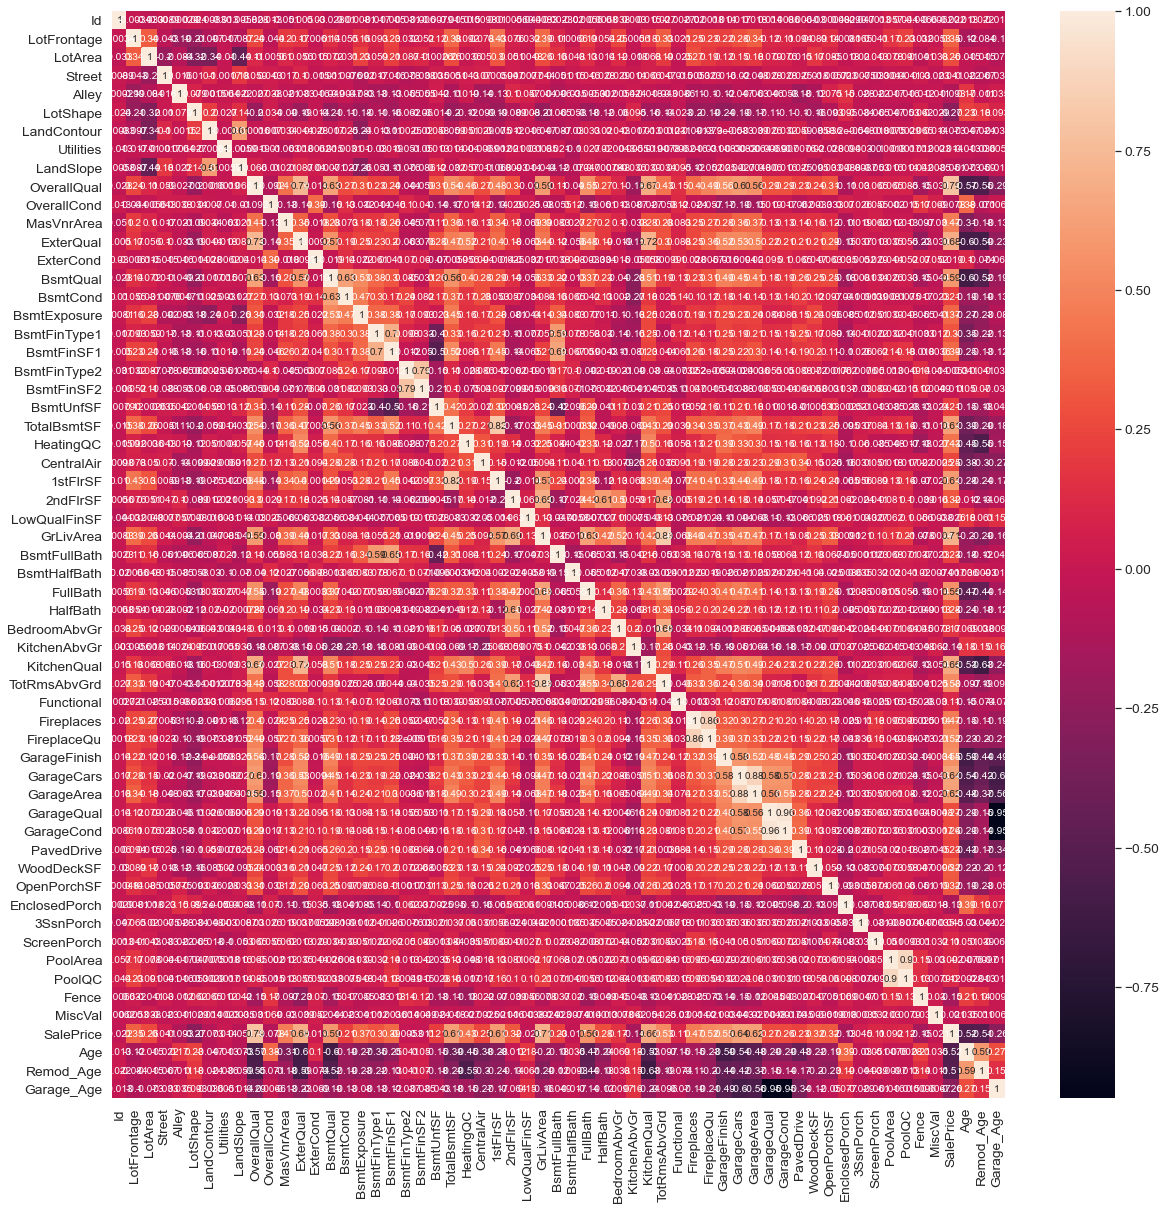

In [417]:
cor = numeric_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor, annot=True)
plt.show()

### DELETING ID FEATURE AND BARPLOT FOR  CORRELATION OF NUMERICAL FEATURES TO SALES PRICE

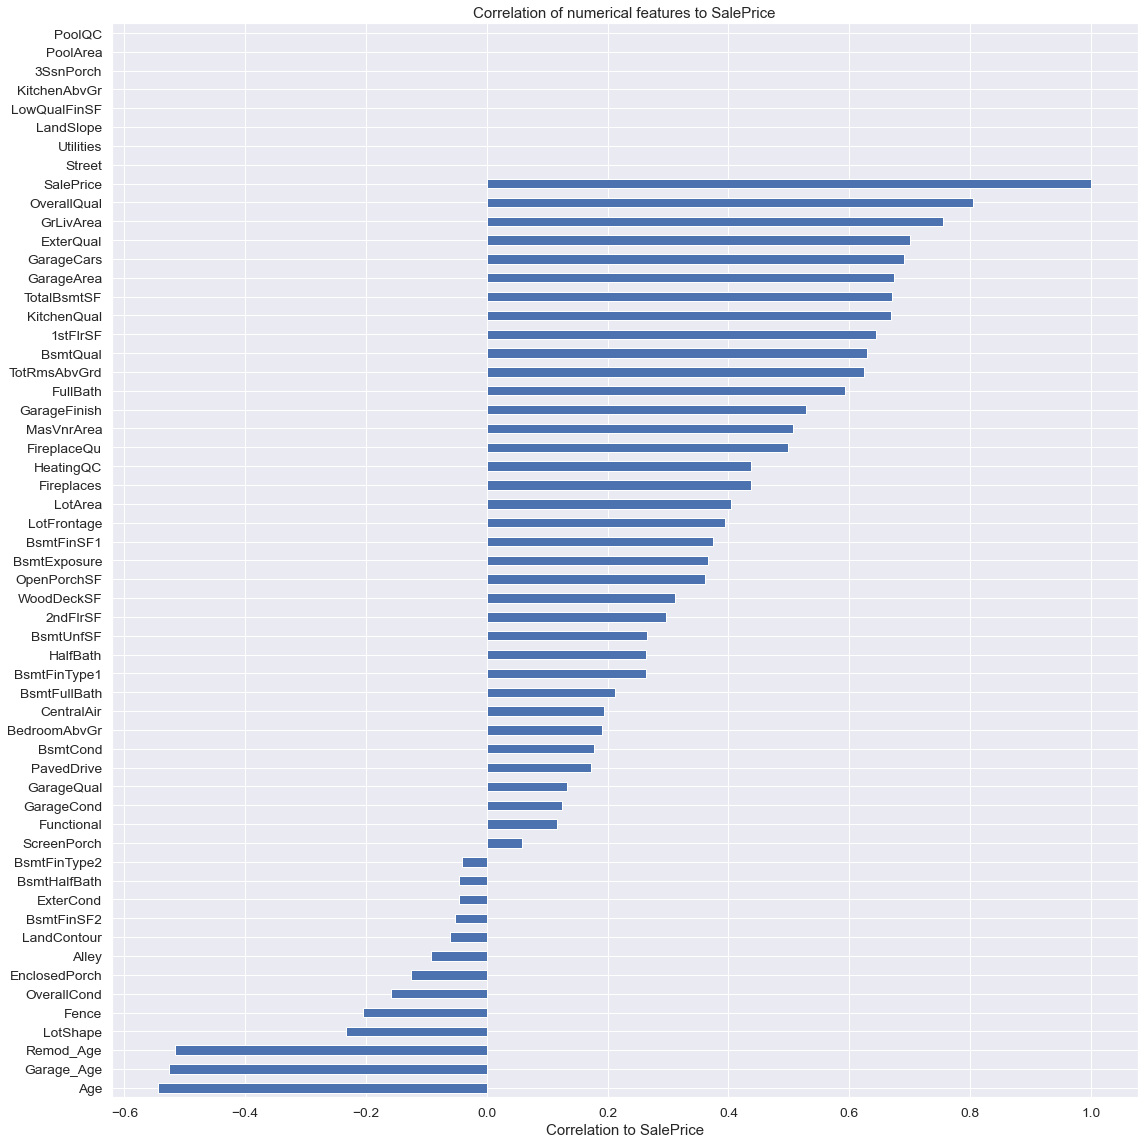

In [418]:
# we drop Id (not relevant)
corr = hs.drop(["Id"], axis=1).select_dtypes(include="number").corr()
plt.figure(figsize=(16,16));
corr["SalePrice"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

### Saleprice correlation matrix- nlargest (15 VARIABLES)

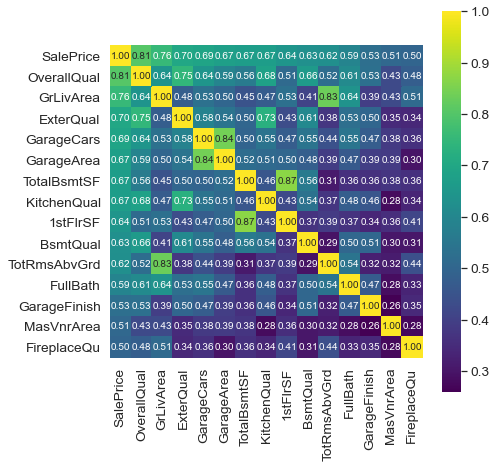

In [419]:

plt.figure(figsize=(7,7))
k = 15 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(hs[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap='viridis',yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Saleprice correlation matrix- nsmallest (15 VARIABLES)

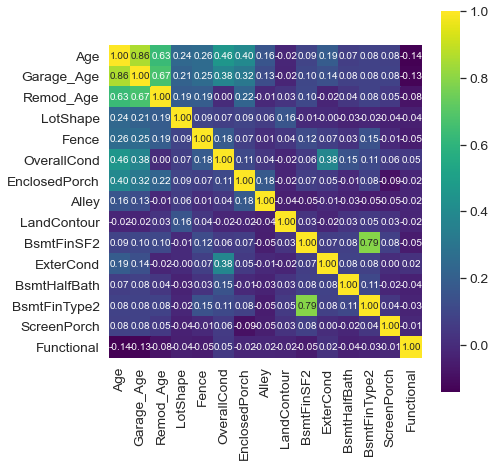

In [420]:
#saleprice correlation matrix- nsmallest
plt.figure(figsize=(7,7))
k = 15 #number of variables for heatmap
cols = corr.nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(hs[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap='viridis',yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Converting binary variables to numeric by mapping to 0 and 1

In [421]:
hs['Street'] = hs['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
hs['CentralAir'] = hs['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
hs['PavedDrive'] = hs['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

### SEGREGATING CATEGORICAL COLUMNS AND DROPPING ID COLUMN

In [422]:
df_hs = hs.drop(['Id'],axis=1)
hs_categorical = df_hs.select_dtypes(include=['object'])
hs_categorical.head()

MSSubClass MSZoning LotConfig Neighborhood Condition1  \
0             2-STORY 1946 & NEWER       RL    Inside      CollgCr       Norm   
1  1-STORY 1946 & NEWER ALL STYLES       RL       FR2      Veenker      Feedr   
2             2-STORY 1946 & NEWER       RL    Inside      CollgCr       Norm   
3             2-STORY 1945 & OLDER       RL    Corner      Crawfor       Norm   
4             2-STORY 1946 & NEWER       RL       FR2      NoRidge       Norm   

  Condition2 BldgType HouseStyle RoofStyle RoofMatl  ... Exterior2nd  \
0       Norm     1Fam     2Story     Gable  CompShg  ...     VinylSd   
1       Norm     1Fam     1Story     Gable  CompShg  ...     MetalSd   
2       Norm     1Fam     2Story     Gable  CompShg  ...     VinylSd   
3       Norm     1Fam     2Story     Gable  CompShg  ...     Wd Shng   
4       Norm     1Fam     2Story     Gable  CompShg  ...     VinylSd   

  MasVnrType Foundation Heating Electrical GarageType MiscFeature SaleType  \
0    BrkFace      PConc    GasA      SBrkr     Attchd        None       WD   
1       None     CBlock    GasA      SBrkr     Attchd        None       WD   
2    BrkFace      PConc    GasA      SBrkr     Attchd        None       WD   
3       None     BrkTil    GasA      SBrkr     Detchd        None       WD   
4    BrkFace      PConc    GasA      SBrkr     Attchd        None       WD   

  SaleCondition  MonthSold  
0        Normal   February  
1        Normal        May  
2        Normal  September  
3       Abnorml   February  
4        Normal   December  

[5 rows x 21 columns]

## convert categorical features into dummies

In [423]:

hs_dummies = pd.get_dummies(hs_categorical, drop_first=True)
hs_dummies.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                1                                      0   
1                                0                                      0   
2                                1                                      0   
3                                0                                      0   
4                                1                                      0   

   ...  MonthSold_December  MonthSold_February  MonthSold_January  \
0  ...                   0                   1                  0   
1  ...                   0                   0                  0   
2  ...                   0                   0                  0   
3  ...                   0                   1                  0   
4  ...                   1                   0                  0   

   MonthSold_July  MonthSold_June  MonthSold_March  MonthSold_May  \
0               0               0                0              0   
1               0               0                0              1   
2               0               0                0              0   
3               0               0                0              0   
4               0               0                0              0   

   MonthSold_November  MonthSold_October  MonthSold_September  
0                   0                  0                    0  
1                   0                  0                    0  
2                   0                  0                    1  
3                   0                  0                    0  
4                   0                  0                    0  

[5 rows x 150 columns]

### dropping original categorical columns

In [424]:
df_hs = df_hs.drop(list(hs_categorical.columns), axis=1)

### concatenating dummy columns to original dataframe

In [352]:
df_hs = pd.concat([df_hs,hs_dummies], axis=1)

In [353]:
df_hs.shape

(1158, 208)

### Splitting data into train and test data using train test split

In [354]:
#train_test_split
df_hs_train,df_hs_test=train_test_split(df_hs,train_size=0.70, random_state=100)
df_hs_train.shape,df_hs_test.shape

((810, 208), (348, 208))

In [355]:
y_train = np.log(df_hs_train.SalePrice)
X_train = df_hs_train.drop("SalePrice",1)

y_test= np.log(df_hs_test.SalePrice)
X_test = df_hs_test.drop("SalePrice",1)

In [356]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((810, 207), (810,), (348, 207), (348,))

In [357]:
num_vars=X_train.select_dtypes(include=['int64','float64','int32']).columns

In [425]:
# numerical variables in train data
num_vars

Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'Age',
       'Remod_Age', 'Garage_Age'],
      dtype='object')

### Standardisation of numerical variable using Standar Scalar

In [359]:
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

### linear regression model
Recursive Feature Elimination : Recursive feature elimination is the process of iteratively finding the most relevant features from the parameters of a learnt ML model. is a popular feature selection algorithm. 

In [361]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,20)
rfe=rfe.fit(X_train,y_train)

col=X_train.columns[rfe.support_]
col

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr',
       'PavedDrive', '3SsnPorch',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-1/2 STORY ALL AGES',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES', 'Condition2_PosA',
       'BldgType_2fmCon', 'BldgType_Duplex', 'HouseStyle_2.5Unf',
       'Exterior1st_BrkComm'],
      dtype='object')

### Using the most effective columns identified in RFE in Linear Regression Model & ordinary least Square

In [362]:
X_train_new=X_train[col]

X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     188.1
Date:                Tue, 25 Jan 2022   Prob (F-statistic):          2.89e-202
Time:                        15:57:10   Log-Likelihood:                 164.73
No. Observations:                 810   AIC:                            -307.5
Df Residuals:                     799   BIC:                            -255.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   12.0593      0.007   1710.288      0.000      12.045      12.073
BsmtFinSF1                                               0.0734      0.006     11.931      0.000       0.061       0.085
BsmtFinSF2                                               0.0021      0.007      0.299      0.765      -0.012       0.016
BsmtUnfSF                                                0.0431      0.006      7.366      0.000       0.032       0.055
TotalBsmtSF                                              0.1260      0.010     12.614      0.000       0.106       0.146
CentralAir                                            3.994e-16   5.11e-17      7.812      0.000    2.99e-16       5e-16
1stFlrSF                                                 0.0347      0.011      3.298      0.001       0.014       0.055
2ndFlrSF                                                 0.0936      0.006     15.376      0.000       0.082       0.106
LowQualFinSF                                          2.251e-16   4.74e-17      4.749      0.000    1.32e-16    3.18e-16
GrLivArea                                                0.1094      0.006     19.712      0.000       0.099       0.120
KitchenAbvGr                                          7.024e-17   7.53e-17      0.933      0.351   -7.76e-17    2.18e-16
PavedDrive                                                    0          0        nan        nan           0           0
3SsnPorch                                                     0          0        nan        nan           0           0
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES    -0.0642      0.041     -1.568      0.117      -0.145       0.016
MSSubClass_2-1/2 STORY ALL AGES                         -0.1070      0.050     -2.141      0.033      -0.205      -0.009
MSSubClass_DUPLEX - ALL STYLES AND AGES                 -0.0385      0.058     -0.665      0.506      -0.152       0.075
Condition2_PosA                                          0.2768      0.223      1.241      0.215      -0.161       0.715
BldgType_2fmCon                                         -0.0642      0.041     -1.568      0.117      -0.145       0.016
BldgType_Duplex                                         -0.0385      0.058     -0.665      0.506      -0.152       0.075
HouseStyle_2.5Unf                                       -0.1070      0.050     -2.141      0.033      -0.205      -0.009
Exterior1st_BrkComm                                     -0.9997      0.199     -5.016      0.000      -1.391      -0.608
==============================================================================
Omnibus:                      457.424   Durbin-Watson:                   2.028
Prob(Omnibus):       

### RIDGE REGRESSION

In [363]:
#RIDGE REGULARIZATION

# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [364]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 8.0}
-0.0782143229162122


In [365]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.028392  3.007962e-03         0.011598    2.332931e-03      0.0001   
1        0.025794  5.034963e-03         0.010599    1.356663e-03       0.001   
2        0.020994  5.174277e-03         0.007999    2.098352e-03        0.01   
3        0.018196  1.720036e-03         0.006799    1.167799e-03        0.05   
4        0.020596  1.495727e-03         0.008597    1.019206e-03         0.1   
5        0.014798  7.463276e-04         0.006197    3.994716e-04         0.2   
6        0.019796  3.543071e-03         0.008598    7.996084e-04         0.3   
7        0.015197  1.468400e-03         0.006397    8.005621e-04         0.4   
8        0.015797  2.135583e-03         0.006798    1.165379e-03         0.5   
9        0.014996  5.917394e-07         0.005998    6.031566e-07         0.6   
10       0.015397  7.991554e-04         0.005998    4.909339e-07         0.7   
11       0.016996  3.032223e-03         0.006598    1.200104e-03         0.8   
12       0.015197  1.469477e-03         0.006398    4.895705e-04         0.9   
13       0.015197  9.781590e-04         0.005997    1.844318e-06         1.0   
14       0.015397  1.355426e-03         0.006597    1.198149e-03         2.0   
15       0.017996  1.897456e-03         0.008598    4.883072e-04         3.0   
16       0.019195  1.165747e-03         0.008198    9.793359e-04         4.0   
17       0.020995  2.280416e-03         0.008398    1.356396e-03         5.0   
18       0.020795  2.992115e-03         0.007599    1.199635e-03         6.0   
19       0.020595  3.135513e-03         0.007998    1.414449e-03         7.0   
20       0.021195  1.326396e-03         0.008398    1.200414e-03         8.0   
21       0.017197  1.467992e-03         0.008798    9.797551e-04         9.0   
22       0.022995  1.672373e-03         0.009398    1.357303e-03        10.0   
23       0.017997  2.964673e-03         0.006997    1.549729e-03          20   
24       0.017797  3.057641e-03         0.007397    1.356614e-03          50   
25       0.017997  1.673086e-03         0.007598    1.355187e-03         100   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.083082          -0.084671   
1    {'alpha': 0.001}          -0.082932          -0.084566   
2     {'alpha': 0.01}          -0.081780          -0.083794   
3     {'alpha': 0.05}          -0.079796          -0.082146   
4      {'alpha': 0.1}          -0.079016          -0.081054   
5      {'alpha': 0.2}          -0.078675          -0.079782   
6      {'alpha': 0.3}          -0.078473          -0.079021   
7      {'alpha': 0.4}          -0.078246          -0.078924   
8      {'alpha': 0.5}          -0.078078          -0.078849   
9      {'alpha': 0.6}          -0.078003          -0.078784   
10     {'alpha': 0.7}          -0.077964          -0.078708   
11     {'alpha': 0.8}          -0.077934          -0.078638   
12     {'alpha': 0.9}          -0.077900          -0.078585   
13     {'alpha': 1.0}          -0.077880          -0.078518   
14     {'alpha': 2.0}          -0.077841          -0.077635   
15     {'alpha': 3.0}          -0.077985          -0.076885   
16     {'alpha': 4.0}          -0.078093          -0.076241   
17     {'alpha': 5.0}          -0.078209          -0.075755   
18     {'alpha': 6.0}          -0.078295          -0.075462   
19     {'alpha': 7.0}          -0.078357          -0.075233   
20     {'alpha': 8.0}          -0.078471          -0.075096   
21     {'alpha': 9.0}          -0.078647          -0.074962   
22    {'alpha': 10.0}          -0.078864          -0.074841   
23      {'alpha': 20}          -0.080654          -0.074510   
24      {'alpha': 50}          -0.083206          -0.076304   
25     {'alpha': 100}          -0.085164          -0.078899   

    split2_test_score  split3_test_score  ...  mean_test_score  \
0           -0.082638          -0.086941  ...        -0.082924   
1        

# Plotting mean test and train scoes with alpha 

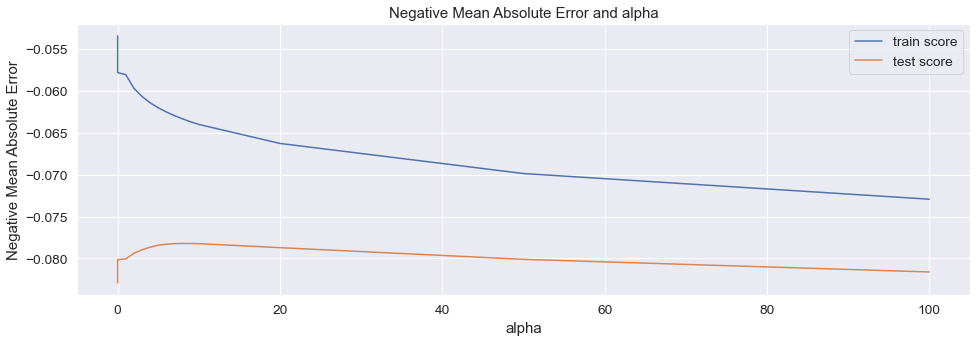

In [426]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### final ridge model

In [427]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.01063325,  0.00990019,  0.        ,  0.00791132, -0.00517561,
        0.00050409,  0.        ,  0.        ,  0.06568034,  0.04047488,
        0.00820901,  0.00122686, -0.01021278,  0.00843332, -0.00216511,
        0.00843028,  0.01248294,  0.02219458, -0.00036358,  0.00497123,
        0.00010802,  0.02560259,  0.01268519,  0.        ,  0.02925795,
        0.02128191,  0.        ,  0.04134956,  0.01162143,  0.00519703,
        0.01872284,  0.01566863,  0.00802412,  0.        ,  0.01209221,
        0.02353173,  0.01097888,  0.01609067,  0.0001727 ,  0.00535028,
        0.01566092,  0.0243547 ,  0.01559595, -0.00947382,  0.        ,
        0.01348962,  0.0084073 ,  0.00668372,  0.        ,  0.01476749,
        0.        ,  0.        , -0.0007125 ,  0.        , -0.05541783,
       -0.01100369,  0.00721493,  0.01953277, -0.02109012,  0.0117894 ,
        0.00020137,  0.00756804, -0.00627329,  0.0063129 ,  0.02484082,
        0.01129821, -0.04075652, -0.00970909, -0.01037337,  0.01

In [368]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9283780163509405


In [369]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9143629298942628


In [370]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.014406843103375012


In [428]:
# Ridge model parameters
model_parameters_1 = list(ridge.coef_)
model_parameters_1.insert(0, ridge.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_1))

[('constant', 11.885),
 ('LotFrontage', 0.011),
 ('LotArea', 0.01),
 ('Street', 0.0),
 ('Alley', 0.008),
 ('LotShape', -0.005),
 ('LandContour', 0.001),
 ('Utilities', 0.0),
 ('LandSlope', 0.0),
 ('OverallQual', 0.066),
 ('OverallCond', 0.04),
 ('MasVnrArea', 0.008),
 ('ExterQual', 0.001),
 ('ExterCond', -0.01),
 ('BsmtQual', 0.008),
 ('BsmtCond', -0.002),
 ('BsmtExposure', 0.008),
 ('BsmtFinType1', 0.012),
 ('BsmtFinSF1', 0.022),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', 0.005),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.026),
 ('HeatingQC', 0.013),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.029),
 ('2ndFlrSF', 0.021),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.041),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', 0.005),
 ('FullBath', 0.019),
 ('HalfBath', 0.016),
 ('BedroomAbvGr', 0.008),
 ('KitchenAbvGr', 0.0),
 ('KitchenQual', 0.012),
 ('TotRmsAbvGrd', 0.024),
 ('Functional', 0.011),
 ('Fireplaces', 0.016),
 ('FireplaceQu', 0.0),
 ('GarageFinish', 0.005),
 ('GarageCars', 0.016),
 ('GarageArea', 

### LASSO REGRESSION

In [372]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [373]:
# cv results
cv_results_l = pd.DataFrame(model_cv_l.cv_results_)

In [374]:
#checking the value of optimum number of parameters
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)

{'alpha': 0.001}
-0.07830085346662835


### FINAL LASSO MODEL

In [429]:
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [430]:
#lets predict the R-squared value of train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9227862283066279


In [431]:
#lets predict the R-squared value of testdata
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9197730237610156


In [432]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.013496695507052504


In [433]:
#Lasso model parameters
model_parameters_1 = list(lasso.coef_)
model_parameters_1.insert(0, lasso.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_1))

[('constant', 11.965),
 ('LotFrontage', 0.014),
 ('LotArea', 0.014),
 ('Street', 0.0),
 ('Alley', 0.009),
 ('LotShape', -0.004),
 ('LandContour', -0.0),
 ('Utilities', 0.0),
 ('LandSlope', 0.0),
 ('OverallQual', 0.074),
 ('OverallCond', 0.042),
 ('MasVnrArea', 0.008),
 ('ExterQual', 0.002),
 ('ExterCond', -0.009),
 ('BsmtQual', 0.003),
 ('BsmtCond', -0.0),
 ('BsmtExposure', 0.006),
 ('BsmtFinType1', 0.009),
 ('BsmtFinSF1', 0.023),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', 0.005),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.029),
 ('HeatingQC', 0.015),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.01),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.079),
 ('BsmtFullBath', 0.013),
 ('BsmtHalfBath', 0.004),
 ('FullBath', 0.011),
 ('HalfBath', 0.009),
 ('BedroomAbvGr', 0.007),
 ('KitchenAbvGr', 0.0),
 ('KitchenQual', 0.012),
 ('TotRmsAbvGrd', 0.02),
 ('Functional', 0.01),
 ('Fireplaces', 0.016),
 ('FireplaceQu', 0.0),
 ('GarageFinish', 0.007),
 ('GarageCars', 0.014),
 ('GarageArea', 0.022

### ERROR STATISTICS
1 LASSO  RMSE  0.013496695507052504

2 RIDGE  RMSE  0.014406843103375012

3 ADJUSTER R2 OF LINEAR REGRESSIN 0.698

### EXTERNAL TEST DATA- FROM KAGGLE 

### REPEATING DATA PREPARATION FOR TESTDATA SIMILAR TO CODES ABOVE AND USING THE LASSO PREDICTIN MODEL FOR PREDICTION

In [434]:
test_data=pd.read_csv('test.txt',delimiter=',')

In [435]:
pd.read_csv('test.txt',delimiter=',',)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [436]:
df_missing=pd.DataFrame((round(100*(test_data.isnull().sum()/len(test_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

missing
PoolQC          99.79
MiscFeature     96.50
Alley           92.67
Fence           80.12
FireplaceQu     50.03
LotFrontage     15.56
GarageYrBlt      5.35
GarageQual       5.35
GarageFinish     5.35
GarageCond       5.35
GarageType       5.21
BsmtCond         3.08
BsmtQual         3.02
BsmtExposure     3.02
BsmtFinType1     2.88
BsmtFinType2     2.88
MasVnrType       1.10
MasVnrArea       1.03
MSZoning         0.27
BsmtHalfBath     0.14

In [437]:
	0.14
#addressing NaN values based on data dictionary

# In column 'PoolQC' (Pool quality), NaN stands for No Pool
test_data['PoolQC'] = test_data['PoolQC'].fillna('No_Pool')

# In column 'MiscFeature' (Miscellaneous Features), NaN stands for None, meaning the house has no miscellaneous features.
test_data['MiscFeature'] = test_data['MiscFeature'].fillna('None')

# In column 'Alley', NaN stands for No Alley Access as per the data dictionary
test_data['Alley'] = test_data['Alley'].fillna('No_Alley_Access')

# In column 'Fence' (Fence Quality), NaN stands for No Fence as per the data dictionary
test_data['Fence'] = test_data['Fence'].fillna('No_Fence')

# In column 'FireplaceQu' (FireplaceQu Quality), NaN stands for No Fireplace as per the data dictionary
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('No_Fireplace')

# LotFrontage stands for Linear feet of street connected to property, there is no explanation to impute this in data dictionary
# Let's consider imputing it with median of the lotFrontage of houses in the same neighbourhood

# Group data by neighborhood and impute missing value with median LotFrontage of all the neighborhood
test_data["LotFrontage"] = test_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# In column 'GarageYrBlt' (Gargae Year Built), NaN stands for houses with no garage, let's impute with 0
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(0)

# 'GarageType', 'GarageFinish', 'GarageQual' (Garage Quality) and 'GarageCond'(Garage Condition)
# Missing values signify no garage as per data dictionary.let's impute NaN values here with No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test_data[col] = test_data[col].fillna('No_Garage')

#BsmtFinType1, BsmtFinType2 (Rating of basement finished area),
#BsmtExposure (Basement Exposure), BsmtQual(Basement Quality), BsmtCond (Basement Conidtion)
#These are all parameter related to basement. A NaN value probably signifies that the house does not have a basement.
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    test_data[col] = test_data[col].fillna('No_Basement')
    
# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode "None"
test_data['MasVnrType'] = test_data['MasVnrType'].fillna('None')

# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode 0 corresponding to None
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)

# In column 'Electrical' (Electrical system), let's impute NaN with "Other"
test_data['Electrical'] = test_data['Electrical'].fillna("Other")

In [438]:
df_missing=pd.DataFrame((round(100*(test_data.isnull().sum()/len(test_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

missing
MSZoning         0.27
BsmtFullBath     0.14
BsmtHalfBath     0.14
Functional       0.14
Utilities        0.14
Exterior2nd      0.07
BsmtFinSF2       0.07
GarageArea       0.07
BsmtFinSF1       0.07
GarageCars       0.07
TotalBsmtSF      0.07
BsmtUnfSF        0.07
Exterior1st      0.07
SaleType         0.07
KitchenQual      0.07
FireplaceQu      0.00
Fireplaces       0.00
Id               0.00
TotRmsAbvGrd     0.00
KitchenAbvGr     0.00

In [439]:
catgl_feats = test_data.dtypes[test_data.dtypes == 'object'].index
numrl_feats = test_data.dtypes[test_data.dtypes != 'object'].index

In [440]:
Nan_cols = []

cols = test_data.columns
for i in cols:
    if (test_data[i].isnull().sum()/len(df_hs))*100 > 0:
        Nan_cols.append(i)

In [441]:
cat_treat_list = []
num_treat_list = []

for i in Nan_cols:
    if i in catgl_feats:
        cat_treat_list.append(i)
    else:
        num_treat_list.append(i)

In [442]:
cat_treat_list

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'KitchenQual',
 'Functional',
 'SaleType']

In [277]:
num_treat_list

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea']

In [278]:
for i in cat_treat_list:
    test_data[i].fillna(test_data[i].mode()[0], inplace = True)

In [279]:
for i in num_treat_list:
    test_data[i].fillna(0, inplace = True)

In [280]:
df_missing=pd.DataFrame((round(100*(test_data.isnull().sum()/len(test_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

missing
Id                0.0
MSSubClass        0.0
GarageType        0.0
FireplaceQu       0.0
Fireplaces        0.0
Functional        0.0
TotRmsAbvGrd      0.0
KitchenQual       0.0
KitchenAbvGr      0.0
BedroomAbvGr      0.0
HalfBath          0.0
FullBath          0.0
BsmtHalfBath      0.0
BsmtFullBath      0.0
GrLivArea         0.0
LowQualFinSF      0.0
2ndFlrSF          0.0
1stFlrSF          0.0
Electrical        0.0
GarageYrBlt       0.0

In [281]:
# label encode ordinal features where there is order in categories

test_data = test_data.replace({  "Alley":        {"No_Alley_Access" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "BsmtExposure": {"No_Basement" : 0, "No" : 2, "Mn" : 2, "Av": 3, 
                                        "Gd" : 4},
                       "BsmtFinType1": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                       "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "Fence":        {"No_Fence" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, 
                                        "GdPrv" : 4},
                       "FireplaceQu":  {"No_Fireplace" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, 
                                        "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, 
                                        "Typ" : 8},
                       "GarageCond":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageQual":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"No_Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, 
                                        "Lvl" : 4},
                       "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, 
                                        "Reg" : 4},
                       "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC":       {"No_Pool" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, 
                                        "Ex" : 4},
                       "Street":       {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, 
                                        "AllPub" : 4}}
                     )

test_data.BsmtCond = test_data.BsmtCond.astype(int)

In [282]:
test_data.GarageQual = test_data.GarageQual.astype(int)

In [283]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   Alley          1459 non-null   int64  
 7   LotShape       1459 non-null   int64  
 8   LandContour    1459 non-null   int64  
 9   Utilities      1459 non-null   int64  
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   int64  
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [284]:
## "MSSubClass" is a numeric column but it should actually be categorical as per the data dictionary, so let's convert that.

test_data=test_data.replace({'MSSubClass' : { 20 : '1-STORY 1946 & NEWER ALL STYLES', 
                                          30:'1-STORY 1945 & OLDER',
                                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                          50:'1-1/2 STORY FINISHED ALL AGES',
                                          60:'2-STORY 1946 & NEWER',
                                          70:'2-STORY 1945 & OLDER',
                                          75:'2-1/2 STORY ALL AGES',
                                          80:'SPLIT OR MULTI-LEVEL',
                                          85:'SPLIT FOYER',
                                          90:'DUPLEX - ALL STYLES AND AGES',
                                         120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                         150:'1-1/2 STORY PUD - ALL AGES',
                                         160:'2-STORY PUD - 1946 & NEWER',
                                         180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                         190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}})

In [285]:
#changing months to categorical
import calendar

test_data['MonthSold'] = test_data['MoSold'].apply(lambda x: calendar.month_name[x])
test_data=test_data.drop(['MoSold'], axis=1)

In [286]:
#changing data type of Gararge yr built to int from float
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].astype(int)

In [287]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   object 
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   Alley          1459 non-null   int64  
 7   LotShape       1459 non-null   int64  
 8   LandContour    1459 non-null   int64  
 9   Utilities      1459 non-null   int64  
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   int64  
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [288]:
#DERIVED VARIABLES which might make more sense than year

test_data['Age'] = test_data['YrSold'] - test_data['YearBuilt']
test_data['Remod_Age'] = test_data['YrSold'] - test_data['YearRemodAdd']
test_data['Garage_Age'] = test_data['YrSold'] - test_data['GarageYrBlt']
test_data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],1, inplace = True)

In [289]:
#converting binary variables to numeric by mapping to 0 and 1

test_data['Street'] = test_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
test_data['CentralAir'] = test_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)

In [290]:
#converting binary variables to numeric by mapping to 0 and 1

test_data['PavedDrive'] = test_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [291]:
test_data_X=test_data.drop('Id',1)

In [292]:
test_data_X.shape

(1459, 78)

In [293]:
test_data_numerical=pd.DataFrame(test_data_X.select_dtypes(include=['int32','int64','float64']))

In [ ]:
test_data_numerical = scaler.transform(test_data_numerical)

In [294]:
test_data_numerical

LotFrontage  LotArea  Street  Alley  LotShape  LandContour  Utilities  \
0            80.0    11622       0      0         4            4          4   
1            81.0    14267       0      0         3            4          4   
2            74.0    13830       0      0         3            4          4   
3            78.0     9978       0      0         3            4          4   
4            43.0     5005       0      0         3            2          4   
...           ...      ...     ...    ...       ...          ...        ...   
1454         21.0     1936       0      0         4            4          4   
1455         21.0     1894       0      0         4            4          4   
1456        160.0    20000       0      0         4            4          4   
1457         62.0    10441       0      0         4            4          4   
1458         74.0     9627       0      0         4            4          4   

      LandSlope  OverallQual  OverallCond  ...  EnclosedPorch  3SsnPorch  \
0             3            5            6  ...              0          0   
1             3            6            6  ...              0          0   
2             3            5            5  ...              0          0   
3             3            6            6  ...              0          0   
4             3            8            5  ...              0          0   
...         ...          ...          ...  ...            ...        ...   
1454          3            4            7  ...              0          0   
1455          3            4            5  ...              0          0   
1456          3            5            7  ...              0          0   
1457          3            5            5  ...              0          0   
1458          2            7            5  ...              0          0   

      ScreenPorch  PoolArea  PoolQC  Fence  MiscVal  Age  Remod_Age  \
0             120         0       0      3        0   49         49   
1               0         0       0      0    12500   52         52   
2               0         0       0      3        0   13         12   
3               0         0       0      0        0   12         12   
4             144         0       0      0        0   18         18   
...           ...       ...     ...    ...      ...  ...        ...   
1454            0         0       0      0        0   36         36   
1455            0         0       0      0        0   36         36   
1456            0         0       0      0        0   46         10   
1457            0         0       0      3      700   14         14   
1458            0         0       0      0        0   13         12   

      Garage_Age  
0             49  
1             52  
2             13  
3             12  
4             18  
...          ...  
1454        2006  
1455          36  
1456          46  
1457        2006  
1458          13  

[1459 rows x 57 columns]

In [295]:
test_data_numerical.head()

LotFrontage  LotArea  Street  Alley  LotShape  LandContour  Utilities  \
0         80.0    11622       0      0         4            4          4   
1         81.0    14267       0      0         3            4          4   
2         74.0    13830       0      0         3            4          4   
3         78.0     9978       0      0         3            4          4   
4         43.0     5005       0      0         3            2          4   

   LandSlope  OverallQual  OverallCond  ...  EnclosedPorch  3SsnPorch  \
0          3            5            6  ...              0          0   
1          3            6            6  ...              0          0   
2          3            5            5  ...              0          0   
3          3            6            6  ...              0          0   
4          3            8            5  ...              0          0   

   ScreenPorch  PoolArea  PoolQC  Fence  MiscVal  Age  Remod_Age  Garage_Age  
0          120         0       0      3        0   49         49          49  
1            0         0       0      0    12500   52         52          52  
2            0         0       0      3        0   13         12          13  
3            0         0       0      0        0   12         12          12  
4          144         0       0      0        0   18         18          18  

[5 rows x 57 columns]

In [296]:
test_data_categorical = test_data_X.select_dtypes(include=['object'])
test_data_categorical.head()

MSSubClass MSZoning LotConfig  \
0                    1-STORY 1946 & NEWER ALL STYLES       RH    Inside   
1                    1-STORY 1946 & NEWER ALL STYLES       RL    Corner   
2                               2-STORY 1946 & NEWER       RL    Inside   
3                               2-STORY 1946 & NEWER       RL    Inside   
4  1-STORY PUD (Planned Unit Development) - 1946 ...       RL    Inside   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0        NAmes      Feedr       Norm     1Fam     1Story     Gable  CompShg   
1        NAmes       Norm       Norm     1Fam     1Story       Hip  CompShg   
2      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      StoneBr       Norm       Norm   TwnhsE     1Story     Gable  CompShg   

   ... Exterior2nd MasVnrType Foundation Heating Electrical GarageType  \
0  ...     VinylSd       None     CBlock    GasA      SBrkr     Attchd   
1  ...     Wd Sdng    BrkFace     CBlock    GasA      SBrkr     Attchd   
2  ...     VinylSd       None      PConc    GasA      SBrkr     Attchd   
3  ...     VinylSd    BrkFace      PConc    GasA      SBrkr     Attchd   
4  ...     HdBoard       None      PConc    GasA      SBrkr     Attchd   

  MiscFeature SaleType SaleCondition MonthSold  
0        None       WD        Normal      June  
1        Gar2       WD        Normal      June  
2        None       WD        Normal     March  
3        None       WD        Normal      June  
4        None       WD        Normal   January  

[5 rows x 21 columns]

In [297]:
test_data_categorical.shape

(1459, 21)

In [298]:
# convert into dummies
test_data_dummies = pd.get_dummies(test_data_categorical, drop_first=True)
test_data_dummies.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   MSSubClass_1-1/2 STORY PUD - ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                      0                                0   
1                                      0                                0   
2                                      0                                0   
3                                      0                                0   
4                                      0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           1   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  1                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  ...  MonthSold_December  \
0                                0  ...                   0   
1                                0  ...                   0   
2                                1  ...                   0   
3                                1  ...                   0   
4                                0  ...                   0   

   MonthSold_February  MonthSold_January  MonthSold_July  MonthSold_June  \
0                   0                  0               0               1   
1                   0                  0               0               1   
2                   0                  0               0               0   
3                   0                  0               0               1   
4                   0                  1               0               0   

   MonthSold_March  MonthSold_May  MonthSold_November  MonthSold_October  \
0                0              0                   0                  0   
1                0              0                   0                  0   
2                1              0                   0                  0   
3                0              0                   0                  0   
4                0              0                   0                  0   

   MonthSold_September  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5

In [299]:
test_data_dummies.shape

(1459, 150)

In [300]:
#dropping original categorical columns
df_test = test_data_X.drop(list(test_data_categorical.columns), axis=1)

In [301]:
df_test.shape

(1459, 57)

In [302]:
#concatenating dummy columns to original dataframe
df = pd.concat([df_test,test_data_dummies], axis=1)

In [304]:
#lets predict the R-squared value of test and train data
y_test_predicted = lasso.predict(df)
y_test_predicted

array([307.61194684, 397.86005676, 399.96654427, ..., 479.45760948,
       278.39174684, 377.29126526])

In [305]:
final_predictions = np.exp(y_test_predicted)
final_predictions

array([3.92799637e+133, 6.14366064e+172, 5.04967143e+173, ...,
       1.68187650e+208, 8.01677064e+120, 7.16992436e+163])

In [306]:
salespriceprediction= pd.DataFrame({'Id': test_data['Id'] ,'SalePrice': final_predictions })
salespriceprediction.to_csv("salespriceprediction.csv",index=False)

### Data description 
The Australian housing dataset has 1460 rows and 81 columns.
 
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)